Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

Reading the CSV file into a Pandas DataFrame

In [2]:
df =pd.read_csv('companies.csv')
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


Count the number of null values in each column

In [3]:
df.isnull().sum()
# number of null values that each columns contains

Company_name               0
Description                0
Ratings                    0
Highly_rated_for          92
Critically_rated_for    7193
Total_reviews              0
Avg_salary                 0
Interviews_taken           0
Total_jobs_available       0
Total_benefits             0
dtype: int64

<Axes: >

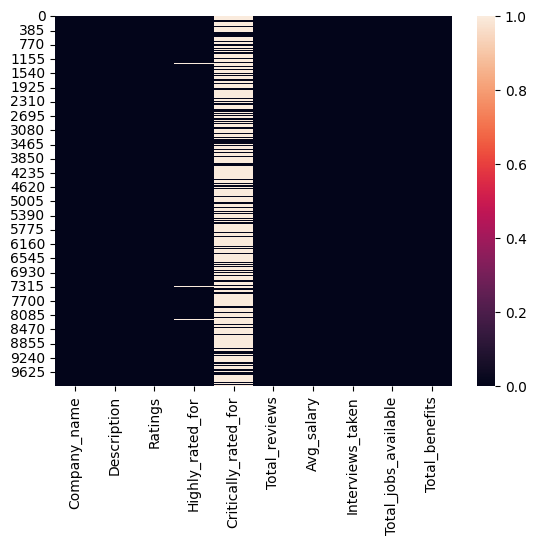

In [ ]:
sb.heatmap(df.isnull())
# heatmap of null values in each columns

Fill the null values in the 'Highly_rated_for' and 'Critically_rated_for' columns with the most frequent value in each column

In [4]:
df['Highly_rated_for'] = df['Highly_rated_for'].fillna(df['Highly_rated_for'].mode()[0])
df['Critically_rated_for'] = df['Critically_rated_for'].fillna(df['Critically_rated_for'].mode()[0])

<Axes: >

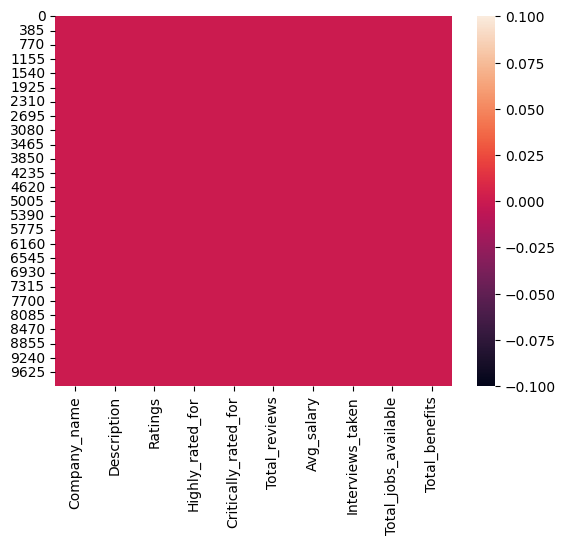

In [ ]:
sb.heatmap(df.isnull())
# heatmap of null values in each columns

In [5]:
# Check for duplicate rows
df.duplicated().sum()

641

In [6]:
df = df.drop_duplicates()
print(f'number of duplicate rows: {df.duplicated().sum()}')
# remove duplicate rows

number of duplicate rows: 0


In [7]:
df.dtypes

Company_name             object
Description              object
Ratings                 float64
Highly_rated_for         object
Critically_rated_for     object
Total_reviews            object
Avg_salary               object
Interviews_taken         object
Total_jobs_available     object
Total_benefits           object
dtype: object

Convert the 'Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', and 'Total_benefits' columns to float

In [8]:
df['Total_reviews'] = df['Total_reviews'].apply(lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and x[-1] == 'k' and x != '--' else (float(x) if isinstance(x, str) and x != '--'  else np.nan))
df['Avg_salary'] = df['Avg_salary'].apply(lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and x[-1] == 'k' and x != '--' else (float(x) if isinstance(x, str) and x != '--'  else np.nan))
df['Interviews_taken'] = df['Interviews_taken'].apply(lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and x[-1] == 'k' and x != '--' else (float(x) if isinstance(x, str) and x != '--'  else np.nan))
df['Total_jobs_available'] = df['Total_jobs_available'].apply(lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and x[-1] == 'k' and x != '--' else (float(x) if isinstance(x, str) and x != '--'  else np.nan))
df['Total_benefits'] = df['Total_benefits'].apply(lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and x[-1] == 'k' and x != '--' else (float(x) if isinstance(x, str) and x != '--'  else np.nan))
print(df.dtypes)

Company_name             object
Description              object
Ratings                 float64
Highly_rated_for         object
Critically_rated_for     object
Total_reviews           float64
Avg_salary              float64
Interviews_taken        float64
Total_jobs_available    float64
Total_benefits          float64
dtype: object


In [9]:
df.isnull().sum()

Company_name               0
Description                0
Ratings                    0
Highly_rated_for           0
Critically_rated_for       0
Total_reviews              0
Avg_salary                 2
Interviews_taken         191
Total_jobs_available    3615
Total_benefits            76
dtype: int64

Fill the null values in the 'Total_jobs_available', 'Interviews_taken', 'Total_benefits', and 'Avg_salary' columns with the mean of each column

In [13]:
df['Total_jobs_available'] = df['Total_jobs_available'].fillna(np.mean(list(df['Total_jobs_available'].dropna())))
df['Interviews_taken'] = df['Interviews_taken'].fillna(df['Interviews_taken'].mean())
df['Total_benefits'] = df['Total_benefits'].fillna(df['Total_benefits'].mean())
df['Avg_salary'] = df['Avg_salary'].fillna(df['Avg_salary'].mean())

Removed unnecessary details from description

In [16]:
df['Description'] = df['Description'].apply(lambda x: x.split('|')[0])
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11500.0
1,Accenture,IT Services & Consulting,4.0,"Company Culture, Skill Development / Learning,...",Promotions / Appraisal,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5800.0
3,Wipro,IT Services & Consulting,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5000.0
4,Capgemini,IT Services & Consulting,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4000.0
